In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Get the path to the CSV file.
X_path = '/content/drive/My Drive/Dataset/X.npy'
Y_path = '/content/drive/My Drive/Dataset/y.npy'

# Load the data from the CSV file into a NumPy array.
x_train = np.load(X_path)
y_train = np.load(Y_path)

In [ ]:
x_train[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [4]:
print ('The first element of y is: ', y_train[0,0])
print ('The last element of y is: ', y_train[-1,0])

The first element of y is:  0
The last element of y is:  9


In [5]:
print("Shape of x_train ", x_train.shape)
print("Shape of y_train ", y_train.shape)

Shape of x_train  (5000, 400)
Shape of y_train  (5000, 1)


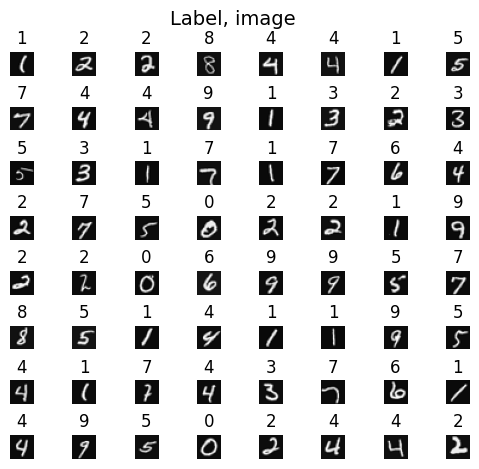

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
# widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y_train[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [17]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation = 'relu', name = 'Layer1'),
        tf.keras.layers.Dense(15, activation = 'relu', name = 'Layer2'),
        tf.keras.layers.Dense(10, activation = 'linear', name = 'layer3'),
    ], name = 'model'
)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 25)                10025     
                                                                 
 Layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
)

model.fit(
    x_train,
    y_train,
    epochs = 40
)

Epoch 1/400
157/157 [==============================] - 1s 2ms/step - loss: 0.0397
Epoch 2/400
157/157 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 3/400
157/157 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 4/400
157/157 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 5/400
157/157 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 6/400
157/157 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 7/400
157/157 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 8/400
157/157 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 9/400
157/157 [==============================] - 1s 4ms/step - loss: 0.0228
Epoch 10/400
157/157 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 11/400
157/157 [==============================] - 1s 3ms/step - loss: 0.0228
Epoch 12/400
157/157 [==============================] - 1s 3ms/step - loss: 0.0208
Epoch 13/400


In [16]:
image_of_two = x_train[1011]

p = model.predict(image_of_two.reshape(-1,400))

print(f" predicting a Two: \n{p}")
print(f" Largest Prediction index: {np.argmax(p)}")
print(y_train[1011])

1/1 [==============================] - 0s 20ms/step
 predicting a Two: 
[[8.0036108e-13 2.3844812e-10 9.9999487e-01 1.6887235e-06 1.6461478e-16
  1.5465423e-09 2.8658464e-13 5.8732132e-07 2.8826130e-06 8.5707791e-10]]
 Largest Prediction index: 2
[2]


1/1 [==============================] - 0s 45ms/step


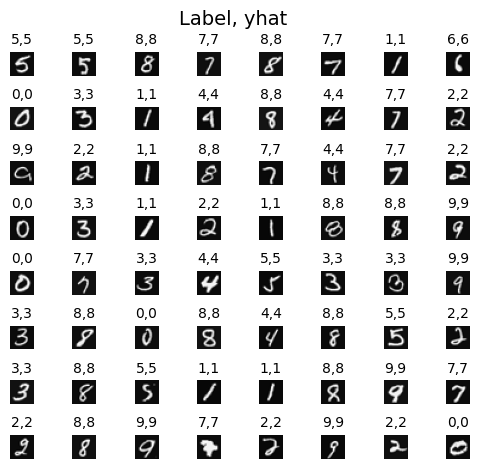

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
# widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(x_train[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y_train[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()